In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

from copulas.datasets import sample_trivariate_xyz

data = sample_trivariate_xyz()
data.head()

,x,y,z
0,9.004177e-05,2.883992e-06,0.638689
1,8.819273e-01,2.911979e-07,1.058121
2,5.003865e-01,4.886504e-04,0.372506
3,1.838544e-12,5.392802e-02,0.687370
4,1.627915e-01,1.634269e-08,-0.881068


<Axes3DSubplot:>

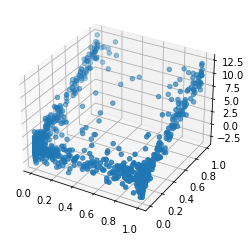

In [12]:
from copulas.visualization import scatter_3d

scatter_3d(data)

In [6]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()

In [7]:
copula.fit(data)

/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5001: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/harasouichirou/miniforge3/envs/ds/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4992: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [9]:
num_samples = 1000

synthetic_data = copula.sample(num_samples)
synthetic_data.head()

,x,y,z
0,2.685181e-01,6.736480e-02,8.570220
1,2.252720e-05,7.621781e-06,-0.065004
2,9.257979e-09,1.062995e-16,-1.196953
3,1.000000e+00,5.322845e-04,-0.085597
4,1.000000e+00,4.620826e-01,0.817390


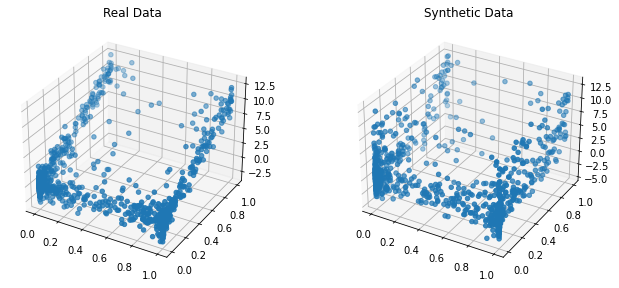

In [13]:
from copulas.visualization import compare_3d

compare_3d(data, synthetic_data)

In [14]:
model_path = 'test_model.pkl'
copula.save(model_path)

In [15]:
new_copula = GaussianMultivariate.load(model_path)

In [16]:
new_samples = new_copula.sample(num_samples)

In [17]:
new_samples.head()

,x,y,z
0,0.999978,6.766834e-06,-2.104715
1,0.000133,5.915002e-02,0.922988
2,0.003253,9.112920e-12,-0.809092
3,1.000000,7.176645e-01,0.989139
4,1.000000,4.214569e-06,-0.259835


In [18]:
copula_params = copula.to_dict()

In [19]:
new_copula = GaussianMultivariate.from_dict(copula_params)

In [20]:
new_samples = new_copula.sample(num_samples)
new_samples.head()

,x,y,z
0,2.684995e-06,4.749430e-01,1.619252
1,1.080148e-03,3.719557e-04,0.922857
2,8.094655e-01,2.540628e-06,-0.684410
3,3.403633e-11,4.575495e-10,-0.861785
4,1.000000e+00,6.135327e-03,-0.812317
